# Analysis to Increase Revenue in Online Store
# Contents <a id='back'></a>

1. Introduction
    
    
2. Data Pra-processing
    * Loading Data
    * Preliminary Exploratory Data
    * Fixing Column Names
    * Checking Data Quality
    * Checking Missing Values
    * Checking Data Duplicate
    * Initial Conclusion
   

3. Data Preparation
    * ICE framework
    * RICE framework


4. Data Analysis
    * Analysis of result of A/B Testing


5. Overall Conclusion

## Introduction <a id='intro'></a>

We are an analyst in a large online store. Together with marketing team, we have compiled a list of hypotheses to help increase revenue. We need to prioritize those hypotheses, run A/B testing, and analyze the results.

## Data Pra-processing <a id='intro'></a>
### Loading Data

In [1]:
# Load the required libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
# Loading data files into DataFrames
# Optimize the data for analysis purposes, type column object converted into category
# Columns containing dates are converted to date data types

df_hypo = pd.read_csv('hypotheses_us.csv', sep=';', dtype={'Hypothesis': 'category'})
df_orders = pd.read_csv('orders_us.csv', dtype={'group': 'category'},  parse_dates=['date'])
df_visits = pd.read_csv('visits_us.csv', dtype={'group': 'category'},  parse_dates=['date'])


We have three DataFrames as follows:  

The data used in the first part of the project:

1. *`/datasets/hypotheses_us.csv`*
    * *`Hypotheses`* — brief description of the hypothesis
    * *`Reach`* — user reach, on a scale of one to ten
    * *`Impact`* — impact on users, on a scale of one to ten
    * *`Confidence`* — belief in the hypothesis, on a scale of one to ten
    * *`Effort`* — the resources needed to test the hypothesis, on a scale of one to ten. The higher the value of *`Effort`*, the more resource intensive the test is.


Data used in the second part of the project:
    
2. *`/datasets/orders_us.csv`*
    * *`transactionId`* — Order ID
    * *`visitorId`* — ID of the user who made the order
    * *`date`* — the date the order was created
    * *`revenue`* — revenue from orders
    * *`group`* — the A/B test group the user belongs to


3. *`/datasets/visits_us.csv`*
    * *`date`* — date
    * *`group`* — A/B test group
    * *`visits`* — the number of visits on the specified date for the specified A/B test cohort


### Preliminary Exploratory Data


#### First DataFrame
    
*`/datasets/hypotheses_us.csv`*

* *`Hypotheses`* — brief description of the hypothesis
* *`Reach`* — user reach, on a scale of one to ten
* *`Impact`* — impact on users, on a scale of one to ten
* *`Confidence`* — belief in the hypothesis, on a scale of one to ten
* *`Effort`* — the resources needed to test the hypothesis, on a scale of one to ten. The higher the value of *`Effort`*, the more resource intensive the test is.


In [3]:
# Show the shape of first DataFrame

df_hypo.shape

(9, 5)

In [4]:
# Show the data info of first DataFrame

df_hypo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Hypothesis  9 non-null      category
 1   Reach       9 non-null      int64   
 2   Impact      9 non-null      int64   
 3   Confidence  9 non-null      int64   
 4   Effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 797.0 bytes


In [5]:
# Show the data head of first DataFrame

df_hypo.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [6]:
# Show the data distribution of first DataFrame

df_hypo.describe()

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


#### Second DataFrame
*`/datasets/orders_us.csv`*

* *`transactionId`* — Order ID
* *`visitorId`* — ID of the user who made the order
* *`date`* — the date the order was created
* *`revenue`* — revenue from orders
* *`group`* — the A/B test group the user belongs to

In [7]:
# Show the shape of second DataFrame

df_orders.shape

(1197, 5)

In [8]:
# Show the data info of second DataFrames

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 38.8 KB


In [9]:
# Show the data head of second DataFrames

df_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [10]:
# Show the data distribution of second DataFrames

df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


#### Third DataFrame
*`/datasets/visits_us.csv`*

* *`date`* — date
* *`group`* — A/B test group
* *`visits`* — the number of visits on the specified date for the specified A/B test cohort

In [11]:
# Show the shape of third DataFrames

df_visits.shape

(62, 3)

In [12]:
# Show the data info of third DataFrames

df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     category      
 2   visits  62 non-null     int64         
dtypes: category(1), datetime64[ns](1), int64(1)
memory usage: 1.2 KB


In [13]:
# Show the data head of three DataFrames

df_visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [14]:
# Show the data distribution of third DataFrames

df_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


### Fixing Column Names

In [15]:
# Change all column names in df_hypo & df_orders to lower case and snake_case

df_hypo.columns = df_hypo.columns.str.lower()
df_orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [16]:
# Look back into table df_visits after fixing the column names

df_hypo.head()

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


In [17]:
# Look back into table df_orders after fixing the column names

df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


### Checking Data Quality

1. Checking Data Quality of table df_hypo

In [18]:
# Checking data quality hypothesis on the table of df_hypo

sorted(df_hypo['hypothesis'].unique())

['Add a customer review page. This will increase the number of orders',
 'Add a subscription form to all the main pages. This will help you compile a mailing list',
 "Add product recommendation blocks to the store's site. This will increase conversion and average purchase size",
 'Add two new channels for attracting traffic. This will bring 30% more users',
 'Change the background color on the main page. This will increase user engagement',
 'Change the category structure. This will increase conversion since users will find the products they want more quickly',
 'Launch a promotion that gives users discounts on their birthdays',
 'Launch your own delivery service. This will shorten delivery time',
 'Show banners with current offers and sales on the main page. This will boost conversion']

In [19]:
# Checking data quality reach on the table of df_hypo

df_hypo['reach'].unique()

array([ 3,  2,  8,  5, 10,  1])

In [20]:
# Checking data quality impact on the table of df_hypo

df_hypo['impact'].unique()

array([10,  5,  3,  1,  2,  7,  9])

In [21]:
# Checking data quality confidence on the table of df_hypo

df_hypo['confidence'].unique()

array([8, 4, 7, 3, 1, 2, 9])

In [22]:
# Checking data quality effort on the table of df_hypo

df_hypo['effort'].unique()

array([ 6, 10,  3,  8,  1,  5])

2. Checking Data Quality of table df_orders

In [23]:
# Checking data transaction_id date on the table of df_orders

df_orders['transaction_id'].value_counts()

3667963787    1
4167421281    1
2875229767    1
504373597     1
2017680897    1
             ..
1853288890    1
2084190534    1
2956594374    1
3646798055    1
3936777065    1
Name: transaction_id, Length: 1197, dtype: int64

In [24]:
# Checking data visitor_id date on the table of df_orders

df_orders['visitor_id'].value_counts()

4256040402    11
2458001652    11
2378935119     9
2038680547     8
199603092      5
              ..
2524310328     1
2210805728     1
2274825520     1
1831227158     1
2108080724     1
Name: visitor_id, Length: 1031, dtype: int64

In [25]:
# Checking data date date on the table of df_orders

df_orders['date'].value_counts()

2019-08-05    48
2019-08-14    47
2019-08-12    47
2019-08-06    46
2019-08-15    46
2019-08-01    45
2019-08-28    45
2019-08-02    44
2019-08-27    44
2019-08-08    43
2019-08-19    43
2019-08-29    42
2019-08-07    42
2019-08-22    41
2019-08-09    41
2019-08-26    41
2019-08-03    40
2019-08-23    40
2019-08-10    39
2019-08-16    38
2019-08-21    37
2019-08-30    35
2019-08-13    35
2019-08-04    33
2019-08-20    32
2019-08-31    32
2019-08-24    31
2019-08-11    26
2019-08-18    26
2019-08-17    24
2019-08-25    24
Name: date, dtype: int64

In [26]:
# Checking data revenue date on the table of df_orders

df_orders['revenue'].value_counts()

20.2      28
40.2      25
10.2      19
25.5      19
20.8      18
          ..
310.2      1
135.1      1
160.8      1
480.8      1
3120.1     1
Name: revenue, Length: 403, dtype: int64

In [27]:
# Checking data group date on the table of df_orders

df_orders['group'].unique()

['B', 'A']
Categories (2, object): ['A', 'B']

3. Checking Data Quality of table df_visits

In [28]:
# Checking data quality date on the table of df_visits

df_visits['date'].value_counts()

2019-08-01    2
2019-08-17    2
2019-08-30    2
2019-08-29    2
2019-08-28    2
2019-08-27    2
2019-08-26    2
2019-08-25    2
2019-08-24    2
2019-08-23    2
2019-08-22    2
2019-08-21    2
2019-08-20    2
2019-08-19    2
2019-08-18    2
2019-08-16    2
2019-08-02    2
2019-08-15    2
2019-08-14    2
2019-08-13    2
2019-08-12    2
2019-08-11    2
2019-08-10    2
2019-08-09    2
2019-08-08    2
2019-08-07    2
2019-08-06    2
2019-08-05    2
2019-08-04    2
2019-08-03    2
2019-08-31    2
Name: date, dtype: int64

In [29]:
# Checking data quality group on the table of df_visits

df_visits['group'].unique()

['A', 'B']
Categories (2, object): ['A', 'B']

In [30]:
# Checking data quality visits on the table of df_visits

df_visits['visits'].value_counts()

490    2
610    2
654    2
718    2
544    1
581    1
509    1
770    1
707    1
655    1
709    1
369    1
721    1
543    1
769    1
746    1
413    1
699    1
421    1
737    1
487    1
560    1
656    1
650    1
546    1
378    1
679    1
676    1
720    1
713    1
719    1
619    1
361    1
507    1
717    1
756    1
667    1
644    1
617    1
406    1
595    1
748    1
735    1
628    1
412    1
577    1
668    1
502    1
575    1
646    1
609    1
468    1
395    1
621    1
722    1
711    1
594    1
531    1
Name: visits, dtype: int64

### Checking Missing Values

In [31]:
# Ensures that there are no missing values in the tabel of df_hypo

df_hypo.isna().sum() / len(df_hypo) * 100

hypothesis    0.0
reach         0.0
impact        0.0
confidence    0.0
effort        0.0
dtype: float64

In [32]:
# Ensures that there are no missing values in the tabel of df_orders

df_orders.isna().sum() / len(df_orders) * 100

transaction_id    0.0
visitor_id        0.0
date              0.0
revenue           0.0
group             0.0
dtype: float64

In [33]:
# Ensures that there are no missing values in the tabel of df_visits

df_visits.isna().sum() / len(df_visits) * 100

date      0.0
group     0.0
visits    0.0
dtype: float64

### Checking Data Duplicate

In [34]:
# Checks for duplicate data

number = 1
for dataset in df_hypo, df_orders, df_visits:
    print(f'\ndata sample for df_{number}')
    print(dataset.duplicated(keep = False).sum())
    number += 1


data sample for df_1
0

data sample for df_2
0

data sample for df_3
0


### Initial  Conclusion

* From the initial data exploration, we find that of the three DataFrames, the data size has been optimized by ensuring that the data type is appropriate.
* The column names in the df_hypo and df_orders tables are not quite right because they don't match the writing style of snake_case. So we have fixed the column names of the two tables.
* There are no missing values.
* There are no duplicate data.

## Data Preparation

1. Implement a framework ICE for prioritizing hypothesis. Sort the hypothesis in descending order of priority.
2. Implement a framework RICE for prioritizing hypothesis. Sort the hypothesis in descending order of priority.
3. Indicates the change in priority of a hypothesis when it is RICE applied to replace ICE. Provide an explanation regarding the change.

### ICE framework

In [35]:
# Implement a framework of ICE

df_hypo['ICE'] = df_hypo['impact'] * df_hypo['confidence'] / df_hypo['effort']
df_hypo.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


In [36]:
# Look into 8th hypothesis based on highest of ICE

df_hypo['hypothesis'][8]

'Launch a promotion that gives users discounts on their birthdays'

### RICE framework

In [37]:
# Implement a framework of RICE

df_hypo['RICE'] = (df_hypo['reach'] * df_hypo['impact'] * df_hypo['confidence']) / df_hypo['effort']
df_hypo.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


In [38]:
# Look into 7th hypothesis based on highest of RICE

df_hypo['hypothesis'][7]

'Add a subscription form to all the main pages. This will help you compile a mailing list'

**Findings:**
* The first priority hypothesis after implement of ICE framework is the eigth hypothesis: Launch a promotion that gives users discounts on their birthdays.
* While, the first priority hypothesis after implement of RICE framework is the seventh hypothesis: Add a subscription form to all the main pages. This will help you compile a mailing list.

**Insights:**
* The eight hypothesis changes to the fifth position when the RICE framework applied, replaced by seventh hypothesis.
* The priority of the hypothesis change when the RICE framework applied, due to the reach factor. The seventh hypothesis has the highest reach factor.

## Data Analysis of A/B Testing Results

We have performed A/B testing and got the results as described in the*`/datasets/orders_us.csv`* and *`/datasets/visits_us.csv`*. Now, we will analyze the results, to find out which group, group A or B drives more increase in income.

Assume that:
* Group A = control group; the group that includes participants who didn't receive the experimental treatment.
* Group B = test group; the group that includes participants who receive the experimental treatment.
* The testing duration is one month which is in August 2019 = 31 days.

In [39]:
# Look back into table df_orders

df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


Firstly, we have to calculate income by date because in table df_orders the data still per transaction_id.

In [40]:
# Calculate the income by date in table df_orders and create a new table

df_orders_agg = df_orders.groupby(['date', 'group']).agg({
    'revenue': 'sum',
    'transaction_id': 'nunique',
    'visitor_id': 'nunique'
}).reset_index()

In [41]:
# Look into the new table of df_orders_agg

df_orders_agg

,date,group,revenue,transaction_id,visitor_id
0,2019-08-01,A,2356.8,24,20
1,2019-08-01,B,1620.0,21,20
2,2019-08-02,A,1503.5,20,19
3,2019-08-02,B,2623.8,24,23
4,2019-08-03,A,1815.2,24,24
...,...,...,...,...,...
57,2019-08-29,B,3623.7,20,20
58,2019-08-30,A,1364.3,11,10
59,2019-08-30,B,3393.3,24,24
60,2019-08-31,A,991.4,12,12


Next, we have to join the table df_orders_agg and df_visits into new table. Then, we grouping the data by each group A and B.

In [42]:
# Join table df_orders_agg and df_visits
# Grouping data by each group and save it into new tables

df_merge = pd.merge(df_orders_agg, df_visits)

df_merge_group_a = df_merge[df_merge['group'] == 'A']
df_merge_group_b = df_merge[df_merge['group'] == 'B']

In [43]:
# Look into the new table of df_merge_group_a

df_merge_group_a.head()

,date,group,revenue,transaction_id,visitor_id,visits
0,2019-08-01,A,2356.8,24,20,719
2,2019-08-02,A,1503.5,20,19,619
4,2019-08-03,A,1815.2,24,24,507
6,2019-08-04,A,1146.6,16,15,717
8,2019-08-05,A,1988.1,25,25,756


In [44]:
# Look into the new table of df_merge_group_b

df_merge_group_b.head()

,date,group,revenue,transaction_id,visitor_id,visits
1,2019-08-01,B,1620.0,21,20,713
3,2019-08-02,B,2623.8,24,23,581
5,2019-08-03,B,1806.8,16,16,509
7,2019-08-04,B,1717.3,17,16,770
9,2019-08-05,B,1495.0,23,23,707


Lastly, we calculate the cumulative of the data using metode *`cumsum()`*.

In [45]:
# Created a function to calculate the data cumulative

for _df in [df_merge_group_a, df_merge_group_b]:
    
    _df['revenue_cumsum'] = _df['revenue'].cumsum()
    _df['transaction_id_cumsum'] = _df['transaction_id'].cumsum()
    _df['visitor_id_cumsum'] = _df['visitor_id'].cumsum()
    _df['visits_cumsum'] = _df['visits'].cumsum()

In [46]:
# Create new table for the data cumulative

df_cumulative = pd.concat([df_merge_group_a, df_merge_group_b]).sort_values(by='date')
df_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845
...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736


### The cumulative income by group


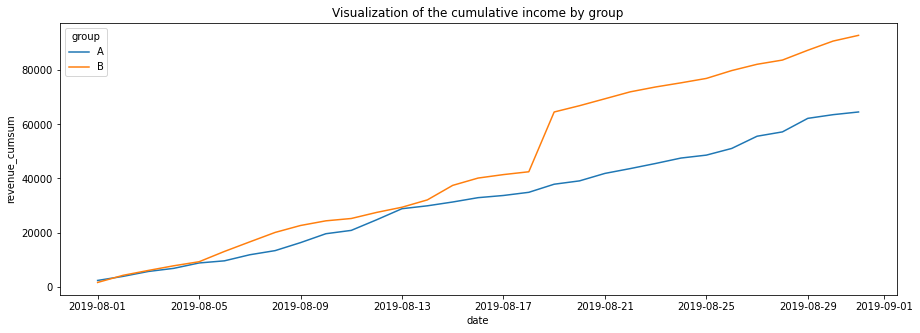

In [47]:
# Figure out the cumulative income by group using lineplot

plt.figure(figsize=(15,5))
sns.lineplot(data=df_cumulative, x='date', y='revenue_cumsum', hue='group')
plt.title('Visualization of the cumulative income by group');

* Findings:
    * At the beginning of August, group A and B were in almost the same position.
    * In the mid of August, group B took the lead and held on until the end of the test.


* Insight:
    * Group B generates more income than group A.


* Assumption:
    * We assumed that the hypothesis test in group B has an effect on increasing income.

### The cumulative average order size by group
* Figure out the cumulative average order size by group.

In [48]:
# Look back into table df_cumulative

df_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845
...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736


In [49]:
# Calculate the cumulative average order size by batch

df_cumulative['order_size_cum'] = df_cumulative['revenue_cumsum'] / df_cumulative['transaction_id_cumsum']
df_cumulative

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235
...,...,...,...,...,...,...,...,...,...,...,...
56,2019-08-29,A,4995.5,22,22,577,62199.2,534,521,17547,116.477903
59,2019-08-30,B,3393.3,24,24,490,90736.3,620,608,18198,146.348871
58,2019-08-30,A,1364.3,11,10,490,63563.5,545,531,18037,116.630275
60,2019-08-31,A,991.4,12,12,699,64554.9,557,543,18736,115.897487


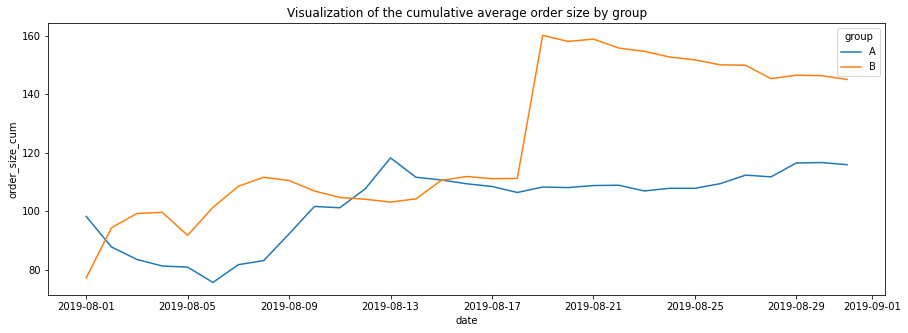

In [50]:
# Visualization of the cumulative average order size by group using lineplot

plt.figure(figsize=(15,5))
sns.lineplot(data=df_cumulative, x='date', y='order_size_cum', hue='group')
plt.title('Visualization of the cumulative average order size by group');

* Findings:
    * At the beginning of August, group A took the lead.
    * In the mid of August, group B took the lead and held on until the end of the test. However, the the trend until the end of the test, group B is decrease, meanwhile group A remained consistently rising, even if only slightly.


* Insight:
    * Group B generates more order than group A.


* Assumptions:
    * We assume that at the end of August, the cumulative number of transactions in group B is actually a lot but the income is small, so the trend at the end of the test is decreasing.
    * We assumed that the hypothesis test in group B has an effect on increasing average order and income.

### The relative differences for the cumulative average order size of group B

* Draw the relative differences for the cumulative average order size of group B as compared to group A.

In [51]:
# Grouping data cumulative by each group and save it into new tables

df_cumulative_a = df_cumulative[df_cumulative['group'] == 'A'].reset_index(drop=True)
df_cumulative_b = df_cumulative[df_cumulative['group'] == 'B'].reset_index(drop=True)

In [52]:
# Join table of df_cumulative_a and df_cumulative_b

df_merge_cum = df_cumulative_a.merge(df_cumulative_b,
                                     on='date',
                                     how='left',
                                     suffixes=['A', 'B'])
df_merge_cum.head()

,date,groupA,revenueA,transaction_idA,visitor_idA,visitsA,revenue_cumsumA,transaction_id_cumsumA,visitor_id_cumsumA,visits_cumsumA,order_size_cumA,groupB,revenueB,transaction_idB,visitor_idB,visitsB,revenue_cumsumB,transaction_id_cumsumB,visitor_id_cumsumB,visits_cumsumB,order_size_cumB
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
1,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
2,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235,B,1806.8,16,16,509,6050.6,61,59,1803,99.190164
3,2019-08-04,A,1146.6,16,15,717,6822.1,84,78,2562,81.215476,B,1717.3,17,16,770,7767.9,78,75,2573,99.588462
4,2019-08-05,A,1988.1,25,25,756,8810.2,109,103,3318,80.827523,B,1495.0,23,23,707,9262.9,101,98,3280,91.711881


In [53]:
# Calculate the cumulative average order size of group B divided by group A to get relative order size

df_merge_cum['relative_order_size'] = df_merge_cum['order_size_cumB'] / df_merge_cum['order_size_cumA'] - 1
df_merge_cum.head()

,date,groupA,revenueA,transaction_idA,visitor_idA,visitsA,revenue_cumsumA,transaction_id_cumsumA,visitor_id_cumsumA,visits_cumsumA,order_size_cumA,groupB,revenueB,transaction_idB,visitor_idB,visitsB,revenue_cumsumB,transaction_id_cumsumB,visitor_id_cumsumB,visits_cumsumB,order_size_cumB,relative_order_size
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000,B,1620.0,21,20,713,1620.0,21,20,713,77.142857,-0.214431
1,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667,0.074915
2,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235,B,1806.8,16,16,509,6050.6,61,59,1803,99.190164,0.188429
3,2019-08-04,A,1146.6,16,15,717,6822.1,84,78,2562,81.215476,B,1717.3,17,16,770,7767.9,78,75,2573,99.588462,0.226225
4,2019-08-05,A,1988.1,25,25,756,8810.2,109,103,3318,80.827523,B,1495.0,23,23,707,9262.9,101,98,3280,91.711881,0.134662


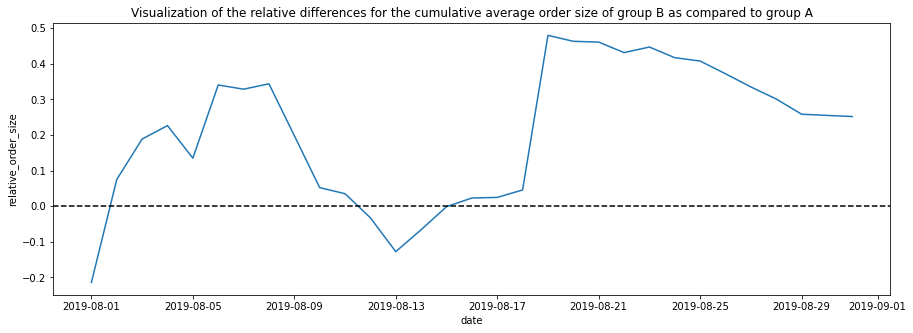

In [54]:
# Visualization of the relative differences for the cumulative average order size of group B as compared to group A
# using lineplot

plt.figure(figsize=(15,5))
sns.lineplot(data=df_merge_cum, x='date', y='relative_order_size')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Visualization of the relative differences for the cumulative average order size of group B as compared to group A');


* Findings:
    * Data shows that the average order size is dominated by group B.
    * Sometimes the average order size of group A is higher than that of group B (line plot below the dotted line).


* Insights:
    * Mostly the average order size made by group B is higher than group A.


* Assumptions:
    * We assumed that the hypothesis test in group B has an effect more on increasing income than group A.

###  The conversion rate for each group
* Calculate the conversion rate for each group as the ratio of orders to the number of visits each day.
* Graph the daily conversion rates of the two groups and explain the differences.

In [55]:
# Look back into table df_cumulative

df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235


In [56]:
# Calculate the conversion rate

df_cumulative['conversion_rate_cumsum'] = df_cumulative['transaction_id_cumsum'] / df_cumulative['visits_cumsum']*100
df_cumulative.head()

,date,group,revenue,transaction_id,visitor_id,visits,revenue_cumsum,transaction_id_cumsum,visitor_id_cumsum,visits_cumsum,order_size_cum,conversion_rate_cumsum
0,2019-08-01,A,2356.8,24,20,719,2356.8,24,20,719,98.200000,3.337969
1,2019-08-01,B,1620.0,21,20,713,1620.0,21,20,713,77.142857,2.945302
2,2019-08-02,A,1503.5,20,19,619,3860.3,44,39,1338,87.734091,3.288490
3,2019-08-02,B,2623.8,24,23,581,4243.8,45,43,1294,94.306667,3.477589
4,2019-08-03,A,1815.2,24,24,507,5675.5,68,63,1845,83.463235,3.685637


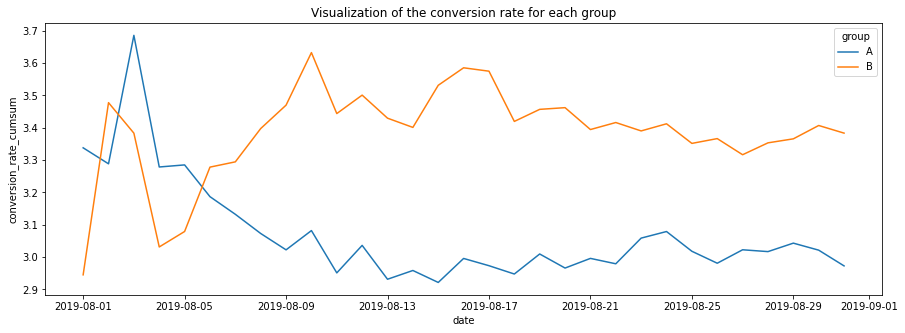

In [57]:
# Visualization of the conversion rate for each group using lineplot

plt.figure(figsize=(15,5))
sns.lineplot(data=df_cumulative, x='date', y='conversion_rate_cumsum', hue='group')
plt.title('Visualization of the conversion rate for each group');

In [58]:
# See the distribution of conversion_rate_cumsum

df_cumulative['conversion_rate_cumsum'].describe()

count    62.000000
mean      3.229161
std       0.219031
min       2.921743
25%       3.018993
50%       3.281900
75%       3.405491
max       3.685637
Name: conversion_rate_cumsum, dtype: float64

* Findings:
    * The order conversion rate is between 2.9 and 3.68. 
    * In early August, group A had higher conversion rates, but group B increased gradually, although it is still fluctuating.


* Insights:
    * Average orders placed every day between 2-3 times.
    * Mostly the conversion rate of order made by group B is higher than group A.


* Assumptions:
    * We assumed that the hypothesis test in group B has an effect more on increasing income than group A.

### Make a scatter chart for the number of orders per user

In [59]:
# Look back into table df_orders

df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [60]:
# Grouping data by visitor_id to get the number of transaction_id per user

visitor_agg = df_orders.groupby(['visitor_id']).agg({
    'transaction_id': 'nunique'
}).reset_index()

visitor_agg = visitor_agg.reset_index()
visitor_agg

,index,visitor_id,transaction_id
0,0,5114589,1
1,1,6958315,1
2,2,8300375,2
3,3,11685486,1
4,4,39475350,1
...,...,...,...
1026,1026,4266935830,2
1027,1027,4278982564,1
1028,1028,4279090005,1
1029,1029,4281247801,1


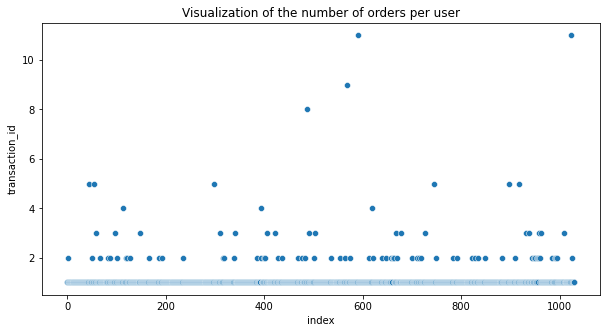

In [61]:
# Visualization of the number of orders per user using scatter plot

plt.figure(figsize=(10,5))
sns.scatterplot(data=visitor_agg, x='index', y='transaction_id')
plt.title('Visualization of the number of orders per user');

In [62]:
# See the distribution of transaction_id

visitor_agg['transaction_id'].describe()

count    1031.000000
mean        1.161009
std         0.724919
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: transaction_id, dtype: float64

* Findings:
    * The average order is 1 time.
    * While outliers orders is between 8 to 11 times.


* Insights:
    * Majority users only made order 1 time.
    * The number of users placing more than two orders is very small.


* Assumptions:
    * Majority users only made order 1 time.
    * We need to calculate the percentile for the number of orders per user to check an anomaly.

### Calculate the 95th and 99th percentile for the number of orders per user
* Determine the point when a data point turns into an anomaly.

In [63]:
# Calculate the 95th and 99th percentile for the number of orders per user

np.percentile(visitor_agg['transaction_id'], [95, 99])

array([2., 4.])

* Findings:
    * 95% of users made two orders and below.
    * 99% of users made four orders and below.


* Insights:
    * The number of users who made orders for more than two orders did not exceed 5%.
    * Those who made orders for more than four orders only amounted to 1%.


* Assumptions:
    * We can assume that users who order more than two orders are either outliers or anomalies.

### Make a scatter chart for the order price

In [64]:
# Look back into table df_orders

df_orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [65]:
# Reset index df_orders and save it into new table for purpose of visualization

vis_order_price = df_orders.reset_index()
vis_order_price.head()

,index,transaction_id,visitor_id,date,revenue,group
0,0,3667963787,3312258926,2019-08-15,30.4,B
1,1,2804400009,3642806036,2019-08-15,15.2,B
2,2,2961555356,4069496402,2019-08-15,10.2,A
3,3,3797467345,1196621759,2019-08-15,155.1,B
4,4,2282983706,2322279887,2019-08-15,40.5,B


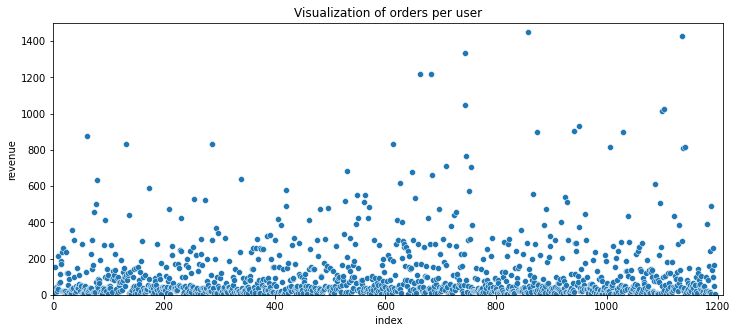

In [66]:
# Scale down the visualization of orders per user using scatter plot

plt.figure(figsize=(12,5))
sns.scatterplot(data=vis_order_price, x='index', y='revenue')
plt.axis([0, 1210, 0, 1500])
plt.title('Visualization of orders per user');

In [67]:
# See the distribution of revenue

vis_order_price['revenue'].describe()

count     1197.000000
mean       131.491646
std        603.004729
min          5.000000
25%         20.800000
50%         50.200000
75%        130.400000
max      19920.400000
Name: revenue, dtype: float64

* Findings:
    * The average order price is $131.
    * While outliers orders is between 8 to 11 times.


* Insights:
    * Majority users only made order with price below $200.
    
    * The number of users placing order price more than $200 is small.


* Assumption:
    * We need to calculate the percentile for the number of price order per user to check an anomaly.

### Calculate the 95th and 99th percentile for the order price
* Determine the point when a data point turns into an anomaly.

In [68]:
# Calculate the 95th and 99th percentile for the order price

np.percentile(vis_order_price['revenue'], [95, 99])

array([435.54 , 900.904])

* Findings:
    * 95% of users made order price of $435.54 and below.

    * 99% of users made order price of $900.904 and below.


* Insights:
    * The number of users who made orders over the price of $435 did not exceed 5%.

    * Those who made orders over $900 only amounted to 1%.


* Assumptions:
    * We can assume that users who order more than $435 are either outliers or anomalies.

### The statistical significance of conversion differences between groups using raw data

In [69]:
# Look back into table df_orders

df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [70]:
# Grouping orders per each group and save it into new tables

orders_group_a = df_orders[df_orders['group'] == 'A'].groupby('visitor_id').agg({
    'transaction_id' : 'nunique'
}).reset_index()

orders_group_b = df_orders[df_orders['group'] == 'B'].groupby('visitor_id').agg({
    'transaction_id' : 'nunique'
}).reset_index()

In [71]:
# Look into table orders_group_a

orders_group_a

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [72]:
# Look into table orders_group_b

orders_group_b

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [73]:
# Look back into table df_visits

df_visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [74]:
# Create new table for the data conversion rate

sample_order_a = pd.concat([orders_group_a['transaction_id'],
                  pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - 
                            len(orders_group_a['transaction_id'])), name='orders')],
                  axis=0)

sample_order_b = pd.concat([orders_group_b['transaction_id'],
                  pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - 
                            len(orders_group_b['transaction_id'])), name='orders')],
                  axis=0)

In [75]:
# Check the distribution of each group

sample_order_a.value_counts()

0    18233
1      473
2       17
3        7
4        3
5        2
7        1
dtype: int64

In [76]:
# Check the distribution of each group

sample_order_b.value_counts()

0    18330
1      552
2       23
3        5
4        4
5        1
6        1
dtype: int64

In [77]:
# Check the length of each group / total visits

len(sample_order_a), len(sample_order_b)

(18736, 18916)

In [78]:
# Check total orders of each group

len(orders_group_a['transaction_id']), len(orders_group_b['transaction_id'])

(503, 586)

**Formulation of Hypothesis testing**

* The significance level / "alpha" value to be used = 0.05
* We will use the Wilcoxon-Mann-Whitney hypothesis approach.


* Ho = The conversion rate of group A and B are statistically the same (=)
* H1 = The conversion rate of group A and B are not statistically the same (/=)

In [79]:
# Hypothesis testing of the statistical significance of conversion differences between two groups

alpha = 0.05

results = st.mannwhitneyu(sample_order_a, sample_order_b) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")

p-value:  0.016792355056752608
The null hypothesis is rejected: the difference is statistically significant


* Findings:
    * Group A visited 18736 times, but conversion rate is about 503 times.
    * Group B visited 18916 times, but conversion rate is about 586 times.
    * The hypothesis result is the null hypothesis is rejected: the difference is statistically significant.


* Insights:
    * The difference in conversion rates between Groups A and B is statistically significant; group A = 503 times while group B = 586 times


* Assumption:
    * We assumed that the hypothesis test in group B has an effect on increasing average order.

### The statistical significance of differences in average revenue size between groups using raw data

In [80]:
# Look back into table df_orders

df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [81]:
# Grouping revenue per each group and save it into new tables

sample_revenue_a = df_orders[df_orders['group'] == 'A']['revenue']
sample_revenue_b = df_orders[df_orders['group'] == 'B']['revenue']

In [82]:
# See the desription of revenue of group A

df_orders[df_orders['group'] == 'A']['revenue'].describe()

count     557.000000
mean      115.897487
std       182.358918
min         5.000000
25%        20.400000
50%        50.100000
75%       130.500000
max      1450.200000
Name: revenue, dtype: float64

In [83]:
# See the desription of revenue of group B

df_orders[df_orders['group'] == 'B']['revenue'].describe()

count      640.000000
mean       145.063438
std        806.992326
min          5.100000
25%         24.050000
50%         50.350000
75%        130.225000
max      19920.400000
Name: revenue, dtype: float64

**Formulation of Hypothesis testing**

* The significance level / "alpha" value to be used = 0.05
* We will use the Wilcoxon-Mann-Whitney hypothesis approach.


* Ho = The average revenue group A and B are statistically the same (=)
* H1 = The average revenue group A and B are not statistically the same (/=)

In [84]:
# Hypothesis testing of the statistical significance of conversion differences between two groups

alpha = 0.05

results = st.mannwhitneyu(sample_revenue_a, sample_revenue_b) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")

p-value:  0.6915246773264736
Failed to reject the null hypothesis: we cannot conclude the difference


* Findings:
    * The hypothesis result is failed to reject the null hypothesis: we cannot conclude the difference.


* Insights:
    * The difference in average revenue size between Groups A and B is not statistically significant; means they are the same.


* Assumption:
    * We assumed that the average revenue in Group A and Group B has the same average of revenue.

### The statistical significance of conversion differences between groups using filtered data

In [85]:
# Look back into table of orders_group_a

orders_group_a

,visitor_id,transaction_id
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [86]:
# Look back into table of orders_group_b

orders_group_b

,visitor_id,transaction_id
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1
...,...,...
581,4258103007,1
582,4266935830,1
583,4279090005,1
584,4281247801,1


In [87]:
# Look back into table of df_orders

df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [88]:
# Create tables for anomalies data

users_with_many_orders = pd.concat([orders_group_a[orders_group_a['transaction_id'] > 2]['visitor_id'],
                                   orders_group_b[orders_group_b['transaction_id'] > 2]['visitor_id']], axis=0)

users_with_expensive_orders = df_orders[df_orders['revenue'] > 435]['visitor_id']

abnormal_users = pd.concat([users_with_many_orders, users_with_expensive_orders],
                          axis=0).drop_duplicates().sort_values()

In [89]:
# See the new table = abnormal_users that will take out from the filtered data later

abnormal_users

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitor_id, Length: 75, dtype: int64

In [90]:
# Create a new table of filtered data of conversion rate = take out abnormal_users

filt_sample_order_a = pd.concat([orders_group_a[~(orders_group_a['visitor_id'].isin(abnormal_users))]['transaction_id'],
                            pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'A']['visits'].sum() - 
                            len(orders_group_a['transaction_id'])), name='orders')], 
                           axis=0)
filt_sample_order_b = pd.concat([orders_group_b[~(orders_group_b['visitor_id'].isin(abnormal_users))]['transaction_id'],
                            pd.Series(0, index=np.arange(df_visits[df_visits['group'] == 'B']['visits'].sum() - 
                            len(orders_group_a['transaction_id'])), name='orders')], 
                           axis=0)


In [91]:
# Check the distribution of each group from filtered data

filt_sample_order_a.value_counts()

0    18233
1      441
2       16
dtype: int64

In [92]:
# Check the distribution of each group from filtered data

filt_sample_order_b.value_counts()

0    18413
1      517
2       21
dtype: int64

In [93]:
# Check the length of each group / total visits from filtered data

len(filt_sample_order_a), len(filt_sample_order_b)

(18690, 18951)

In [94]:
# Check total orders of each group from filtered data

len(orders_group_a[~(orders_group_a['visitor_id'].isin(abnormal_users))]), len(orders_group_b[~(orders_group_b['visitor_id'].isin(abnormal_users))])


(457, 538)

**Formulation of Hypothesis testing**

* The significance level / "alpha" value to be used = 0.05
* We will use the Wilcoxon-Mann-Whitney hypothesis approach.


* Ho = The conversion rate of filtered data of group A and B are statistically the same (=)
* H1 = The conversion rate of filtered data of group A and B are not statistically the same (/=)

In [95]:
# Hypothesis testing of the statistical significance of conversion differences between two groups using filtered data

alpha = 0.05

results = st.mannwhitneyu(filt_sample_order_a, filt_sample_order_b) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")

p-value:  0.017195008141682816
The null hypothesis is rejected: the difference is statistically significant


* Findings:
    * Filtered data of group A visited 18690 times, but conversion rate is about 457 times.
    * Filtered data of group B visited 18951 times, but conversion rate is about 538 times.
    * The hypothesis result is the null hypothesis is rejected: the difference is statistically significant.


* Insights:
    * The difference in conversion rates between Groups A and B using filtered data is statistically significant; group A = 457 times while group B = 538 times.


* Assumption:
    * We assumed that the hypothesis test in group B has an effect on increasing average order.

### The statistical significance of differences in average order size between groups using filtered data

In [96]:
# Look back into table of df_orders

df_orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [97]:
# Create a new table of filtered data of revenue = take out abnormal_users

filt_sample_revenue_a = df_orders[(df_orders['group']=='A') & ~(orders_group_a['visitor_id'].isin(abnormal_users))]['revenue']
filt_sample_revenue_b = df_orders[(df_orders['group']=='B') & ~(orders_group_b['visitor_id'].isin(abnormal_users))]['revenue']


**Formulation of Hypothesis testing**

* The significance level / "alpha" value to be used = 0.05
* We will use the Wilcoxon-Mann-Whitney hypothesis approach.


* Ho = The average revenue group A and B using filtered data are statistically the same (=)
* H1 = The average revenue group A and B using filtered data are not statistically the same (/=)

In [98]:
# Hypothesis testing of the statistical significance of conversion differences between two groups

alpha = 0.05

results = st.mannwhitneyu(filt_sample_revenue_a, filt_sample_revenue_b) 

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected: the difference is statistically significant")
else:
    print("Failed to reject the null hypothesis: we cannot conclude the difference")

p-value:  0.2566970534990096
Failed to reject the null hypothesis: we cannot conclude the difference


* Findings:
    * The hypothesis result is failed to reject the null hypothesis: we cannot conclude the difference.


* Insights:
    * The difference in average revenue size between Groups A and B using filtered data is not statistically significant; means they are the same.


* Assumption:
    * We assumed that the average revenue in Group A and Group B using filtered data has the same average of revenue.

## Overall Conclusion

* **In the data pre-processing section:**
    1. From the initial data exploration, we find that of the three DataFrames, the data size has been optimized by ensuring that the data type is appropriate.
    2. The column names in the df_hypo and df_orders tables are not quite right because they don't match the writing style of snake_case. So we have fixed the column names of the two tables.
    3. There are no missing values.
    4. There are no duplicate data.
 
 
* **In data preparation:** 
    1. The first priority hypothesis after implement of ICE framework is the eigth hypothesis: Launch a promotion that gives users discounts on their birthdays.
    2. While, the first priority hypothesis after implement of RICE framework is the seventh hypothesis: Add a subscription form to all the main pages. This will help you compile a mailing list.
    3. The eight hypothesis changes to the fifth position when the RICE framework applied, replaced by seventh hypothesis.
    4. The priority of the hypothesis change when the RICE framework applied, due to the reach factor. The seventh hypothesis has the highest reach factor.
    
    
* **In data analysis of A/B testing results:**
    * Group A = control group; the group that includes participants who didn't receive the experimental treatment.
    * Group B = test group; the group that includes participants who receive the experimental treatment.

1. At the beginning of August:
    * The cumulative income each group A and B were in almost the same position.
    * While, in the cumulative average order size, group A took the lead.
    
    
2. Next, in the mid of August:
    * The cumulative income, group B took the lead and held on until the end of the test.
    * While, in the cumulative average order size, the group B is also took the lead and held on until the end of the test.
    * However, the the trend until the end of the test, the group B is decrease, meanwhile group A remained consistently rising, even if only slightly. We assume that at that time, the cumulative number of transactions in group B is actually a lot but the income is small.


3. Average order size & conversion rate:
    * Mostly the average order size made by group B is higher than group A.
    * The conversion rate of order every day is between 2-3 times and mostly average orders made group B is higher than group A.
    * The number of users who made orders for more than two orders did not exceed 5%. While, those who made orders for more than four orders only amounted to 1%.
    * The number of users who made orders over the price of USD435 did not exceed 5% and those who made orders over USD900 only amounted to 1%.


4. The hypothesis results of raw data:
    * The difference in conversion rates between Groups A and B is statistically significant; group A = 503 times while group B = 586 times.
    * The difference in average revenue size between Groups A and B is not statistically significant; means they are the same.


5. The hypothesis results of filtered data (exclude abnormal data):
    * The difference in conversion rates between Groups A and B using filtered data is statistically significant; group A = 457 times while group B = 538 times.
    * The difference in average revenue size between Groups A and B using filtered data is not statistically significant; means they are the same.
    
    
6. We assumed that:
    * The hypothesis test in group B has an effect on increasing income.
    * The users who order more than two orders are either outliers or anomalies.
    * The users who order more than USD435 are either outliers or anomalies.
    * We assumed that the average revenue in Group A and Group B of raw data or filtered data has the same average of revenue.
    

7. Recommendation:
    * Based on analysis above, we recommend to stop the testing and consider the group B as the leader. Because the group B who receive the experimental treatment took the lead both the cumulative income and the cumulative average order size during the testing period. The hypothesis test also shows that group B has an effect on increasing income.